In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve



In [2]:
import warnings

warnings.filterwarnings("ignore")

plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
)
pitayasmoothie = ["#18c0c4", "#f62196", "#A267F5", "#f3907e", "#ffe46b", "#fefeff", "#18c0c4"]
colors = sns.color_palette(pitayasmoothie)

## Carga de datos


In [3]:
df = pd.read_csv("./data/diabetes.csv")

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
def null_count():
    return pd.DataFrame(
        {
            "features": df.columns,
            "dtypes": df.dtypes.values,
            "NaN count": df.isnull().sum().values,
            "NaN percentage": df.isnull().sum().values / df.shape[0],
        }
    )


null_count()

,features,dtypes,NaN count,NaN percentage
0,Pregnancies,int64,0,0.0
1,Glucose,int64,0,0.0
2,BloodPressure,int64,0,0.0
3,SkinThickness,int64,0,0.0
4,Insulin,int64,0,0.0
5,BMI,float64,0,0.0
6,DiabetesPedigreeFunction,float64,0,0.0
7,Age,int64,0,0.0
8,Outcome,int64,0,0.0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Exploración

### Análisis Univariado

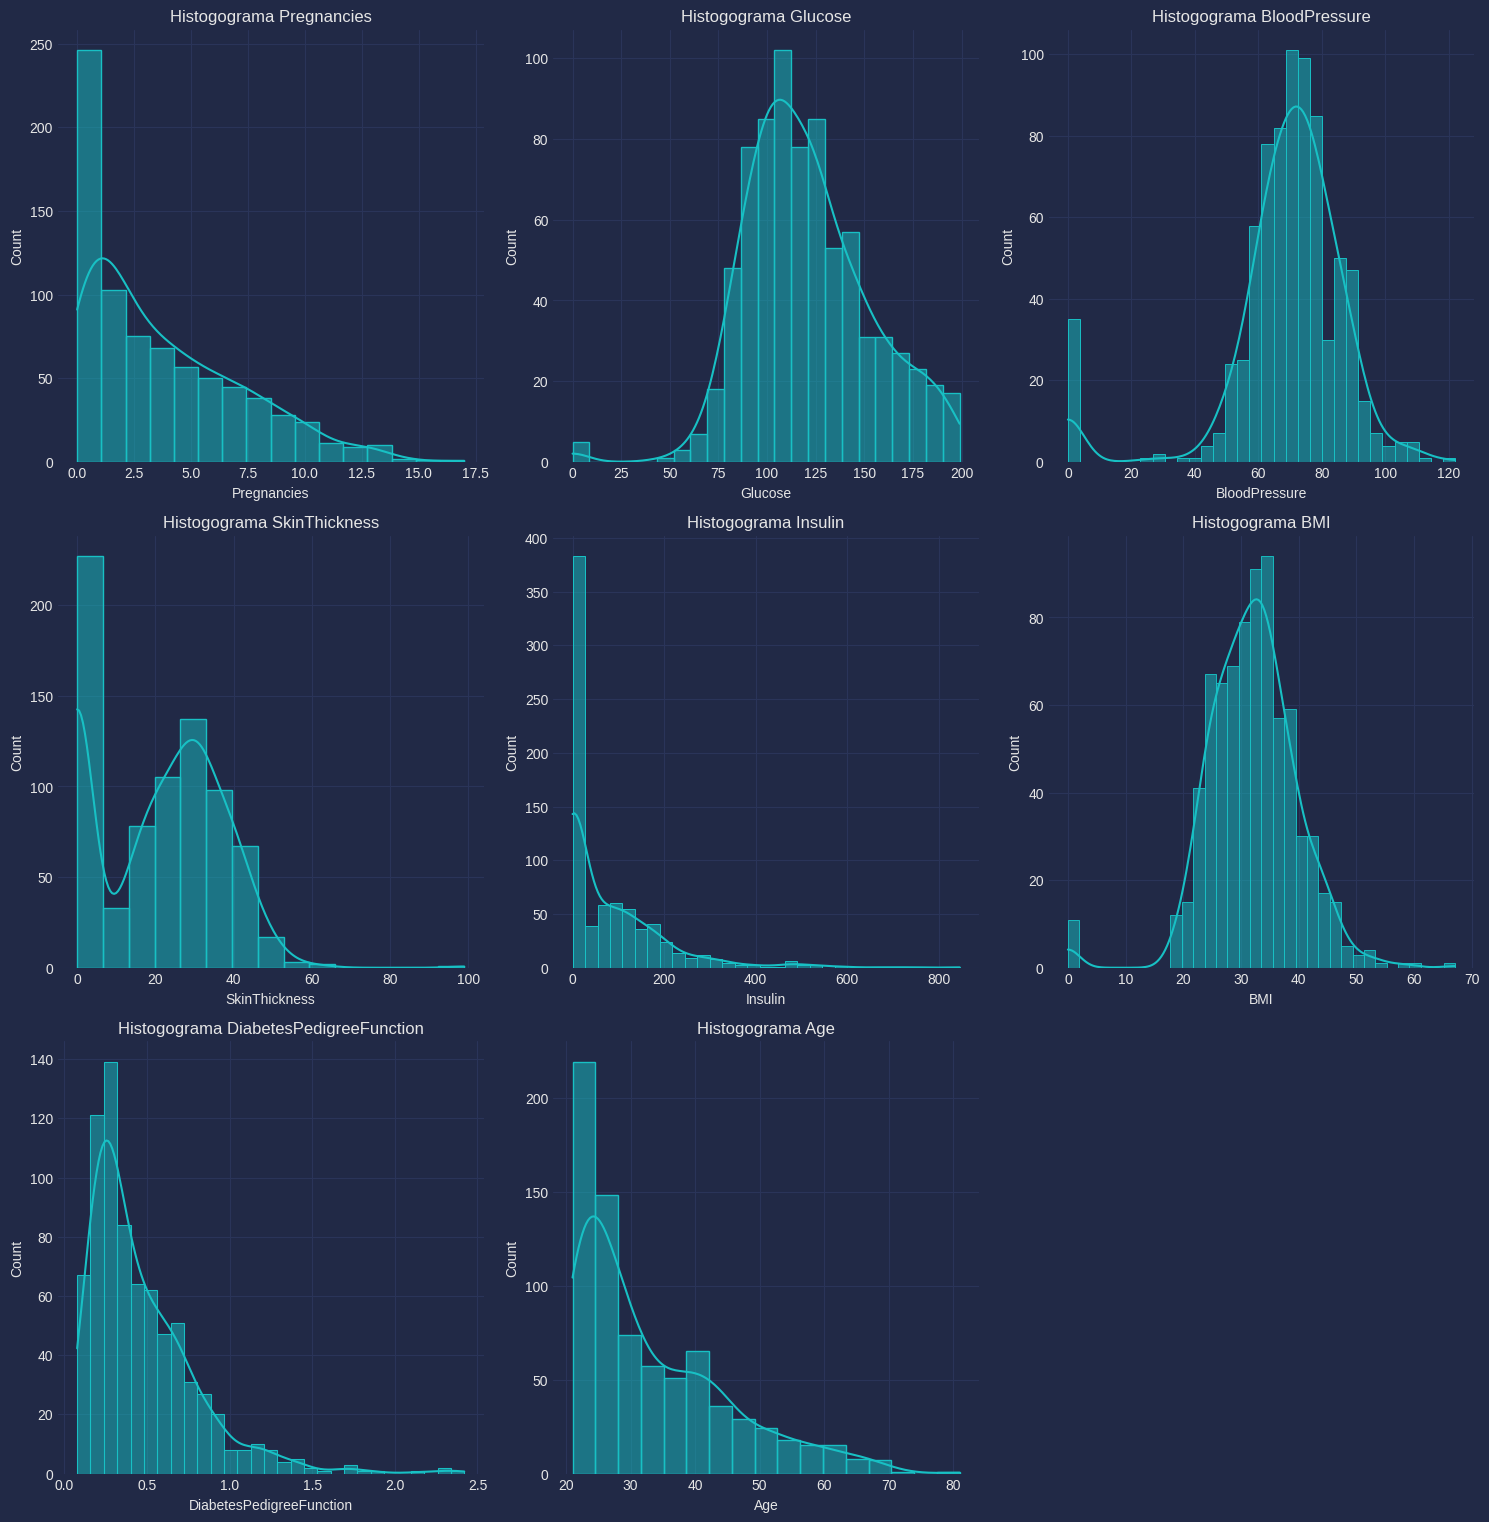

In [11]:
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(df.columns.drop("Outcome")):
    plt.subplot(num_rows, 3, i + 1)

    sns.histplot(data=df, x=column, kde=True, fill=True, edgecolor="#18c0c4")

    plt.title(f"Histogograma {column}")

plt.tight_layout()
plt.show()

### Análisis Bivariado


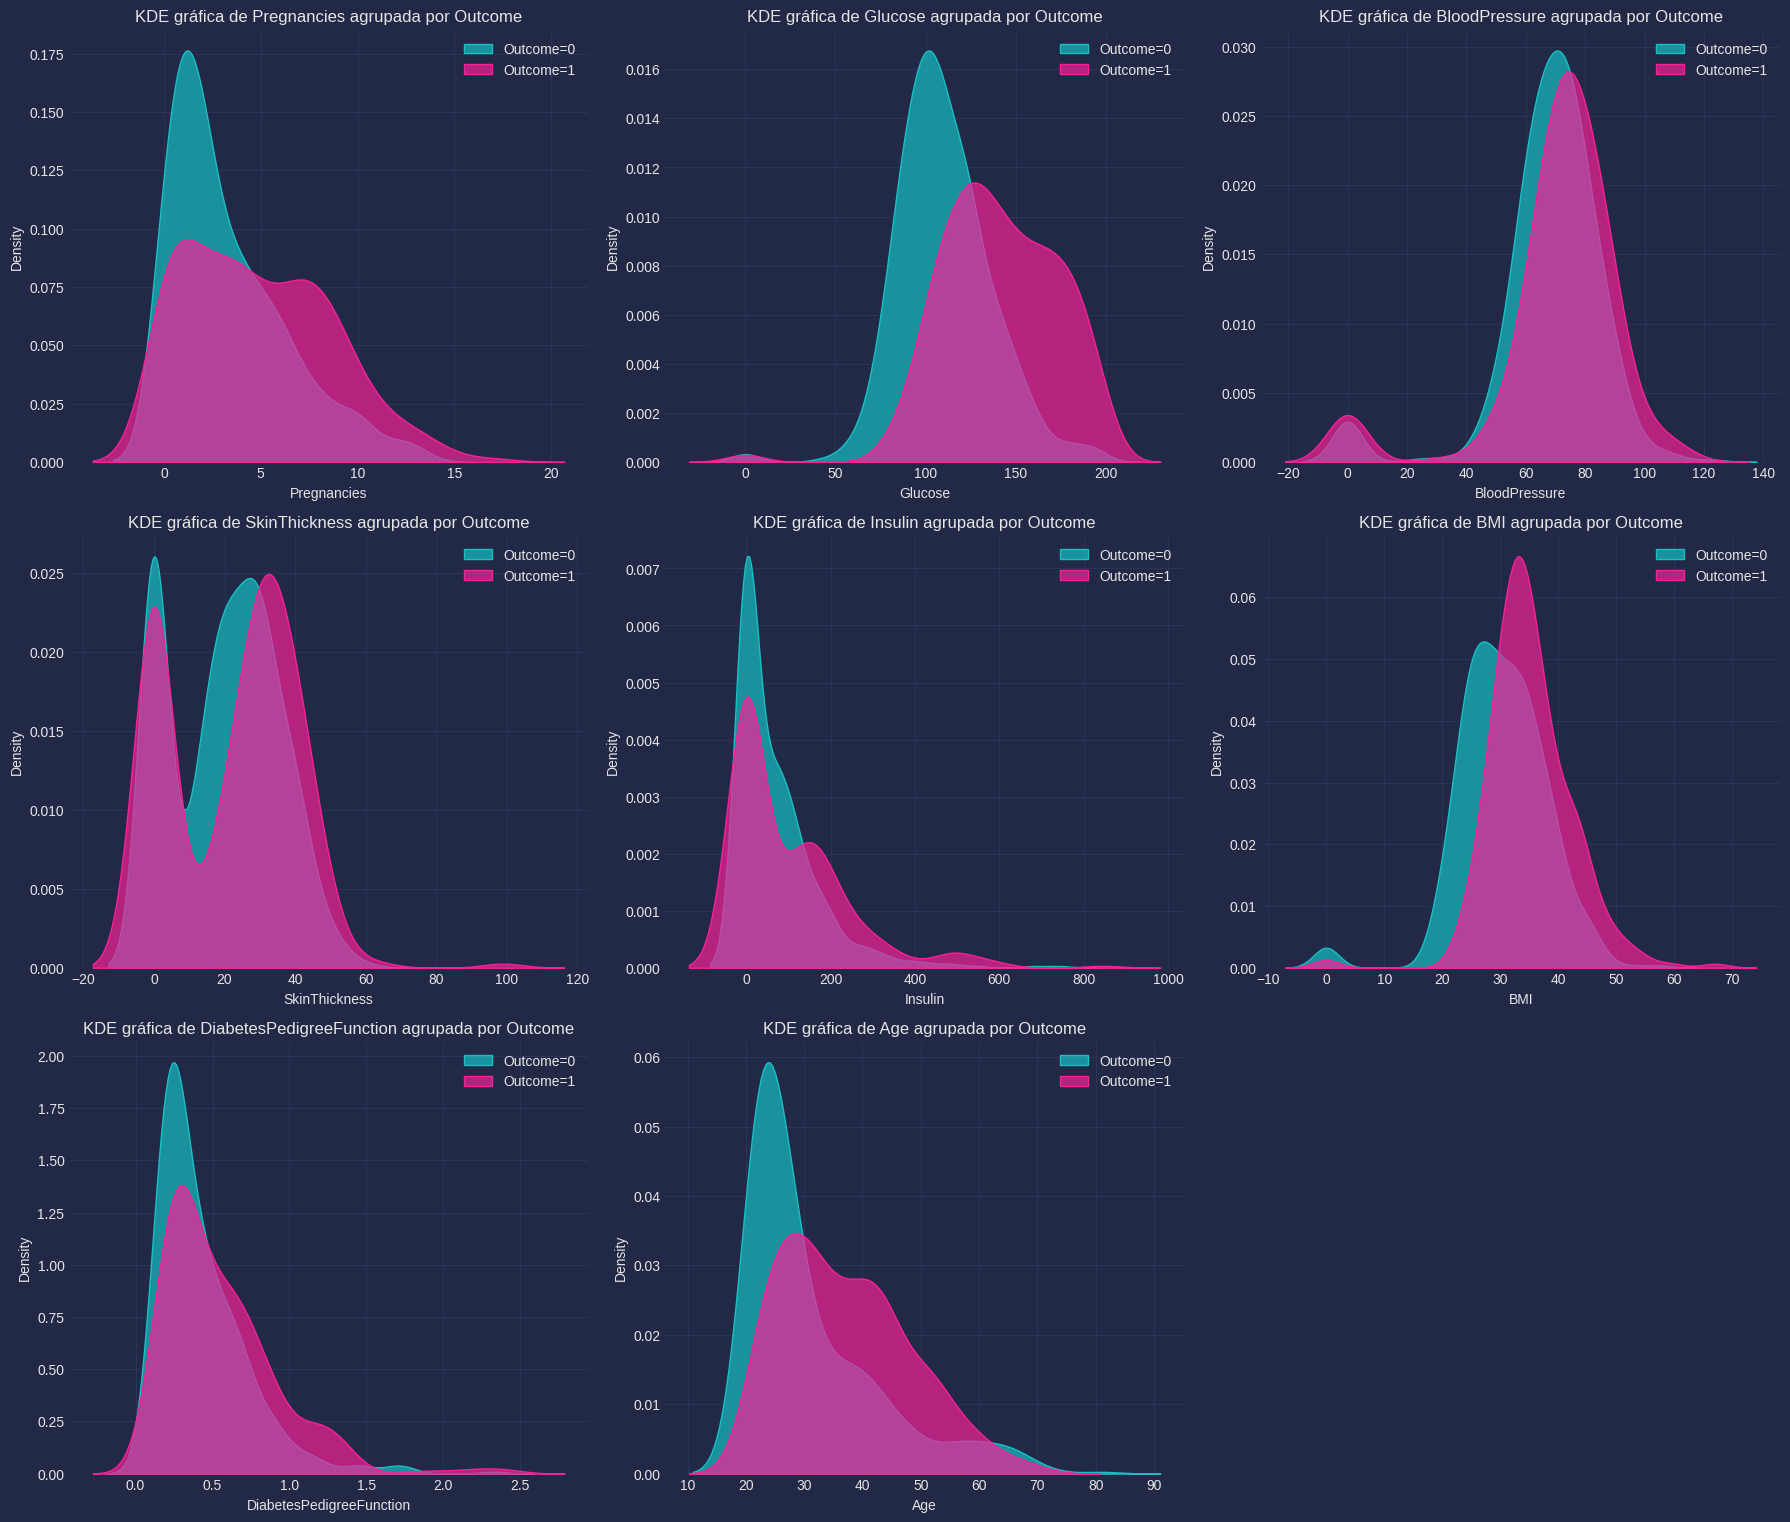

In [12]:
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2


plt.figure(figsize=(18, 5 * num_rows))

for i, column in enumerate(df.columns.drop("Outcome")):
    plt.subplot(num_rows, 3, i + 1)

    sns.kdeplot(
        data=df[df["Outcome"] == 0][column],
        label="Outcome=0",
        fill=True,
        color=colors[0],
        alpha=0.7,
    )

    sns.kdeplot(
        data=df[df["Outcome"] == 1][column],
        label="Outcome=1",
        fill=True,
        color=colors[1],
        alpha=0.7,
    )

    plt.title(f"KDE gráfica de {column} agrupada por Outcome")
    plt.legend()

plt.tight_layout()
plt.show()

### Análisis Múltivariable

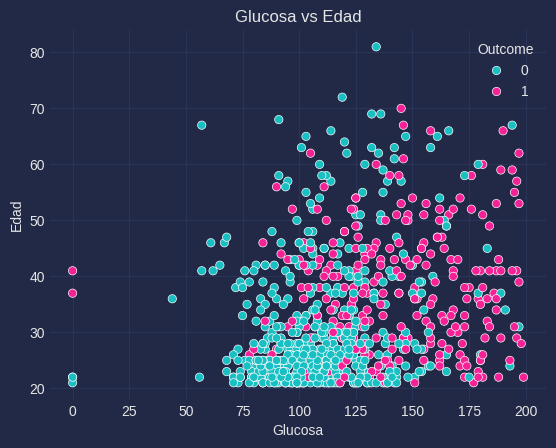

In [13]:
sns.scatterplot(x="Glucose", y="Age", hue="Outcome", data=df, palette=colors)
plt.title("Glucosa vs Edad")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()

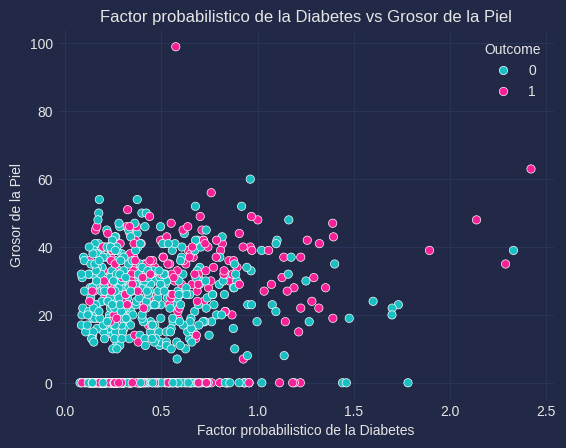

In [14]:
sns.scatterplot(
    x="DiabetesPedigreeFunction",
    y="SkinThickness",
    hue="Outcome",
    data=df,
    palette=colors,
)
plt.title("Factor probabilistico de la Diabetes vs Grosor de la Piel")
plt.xlabel("Factor probabilistico de la Diabetes")
plt.ylabel("Grosor de la Piel")
plt.show()

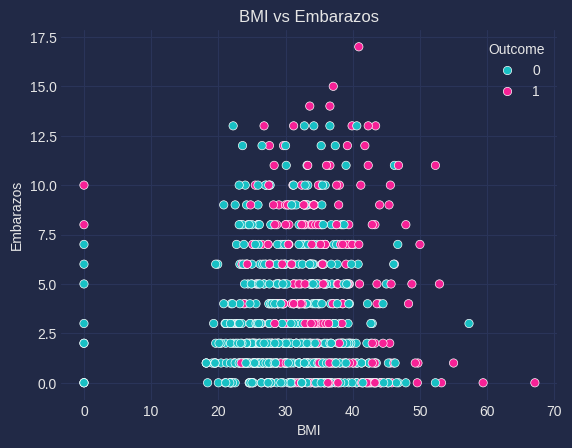

In [15]:
sns.scatterplot(x="BMI", y="Pregnancies", hue="Outcome", data=df, palette=colors)
plt.title("BMI vs Embarazos")
plt.xlabel("BMI")
plt.ylabel("Embarazos")
plt.show()

### Matriz de correlación


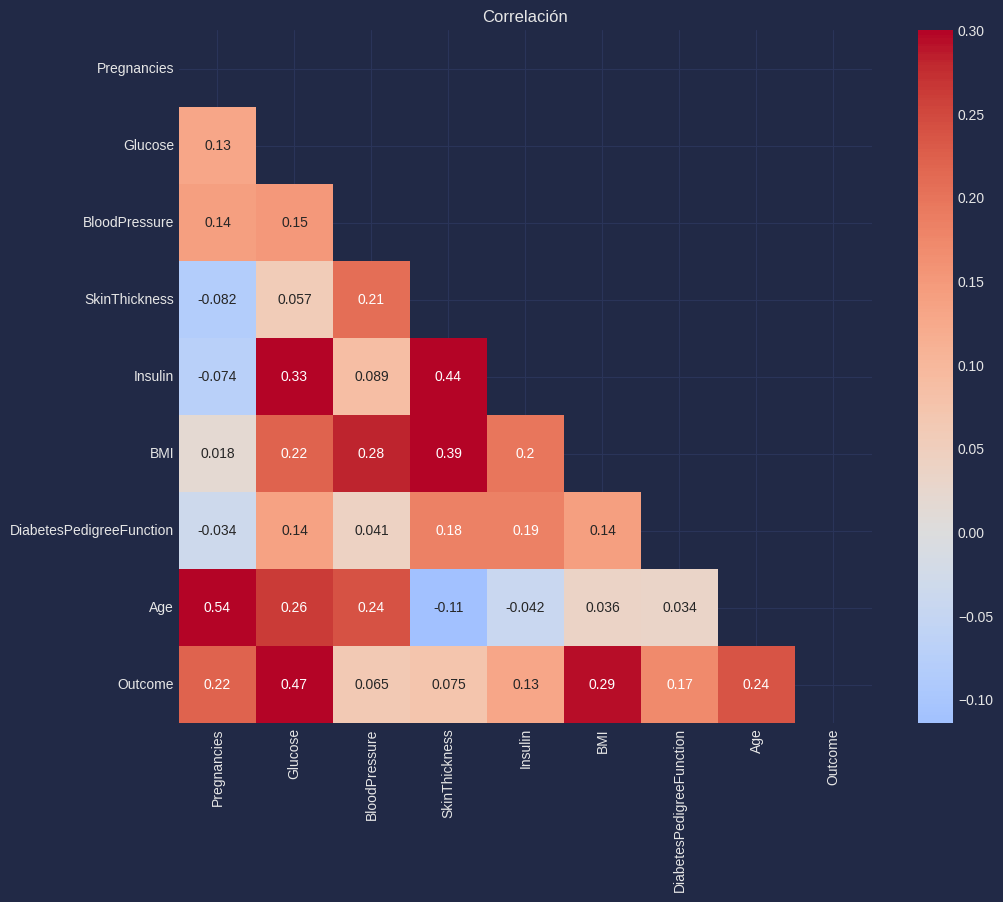

In [16]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, mask=mask, cmap="coolwarm", vmax=0.3, center=0, square=True, annot=True
)

plt.title("Correlación")
plt.show()

### Preprocesado de datos


In [17]:
df1 = df.copy()

In [18]:
# chaeck 0 value
numeric_columns = df1.select_dtypes(include=["int", "float"]).columns

zero_counts = df1[numeric_columns].eq(0).sum()

print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64



> Zero values for Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI are unrealistic and may indicate dangerous or unlikely medical conditions

In [19]:
columns_non_nol = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df1[columns_non_nol] = df1[columns_non_nol].replace(0, pd.NA)

for column in columns_non_nol:
    median_value = df1[column].median()
    df1[column].fillna(median_value, inplace=True)

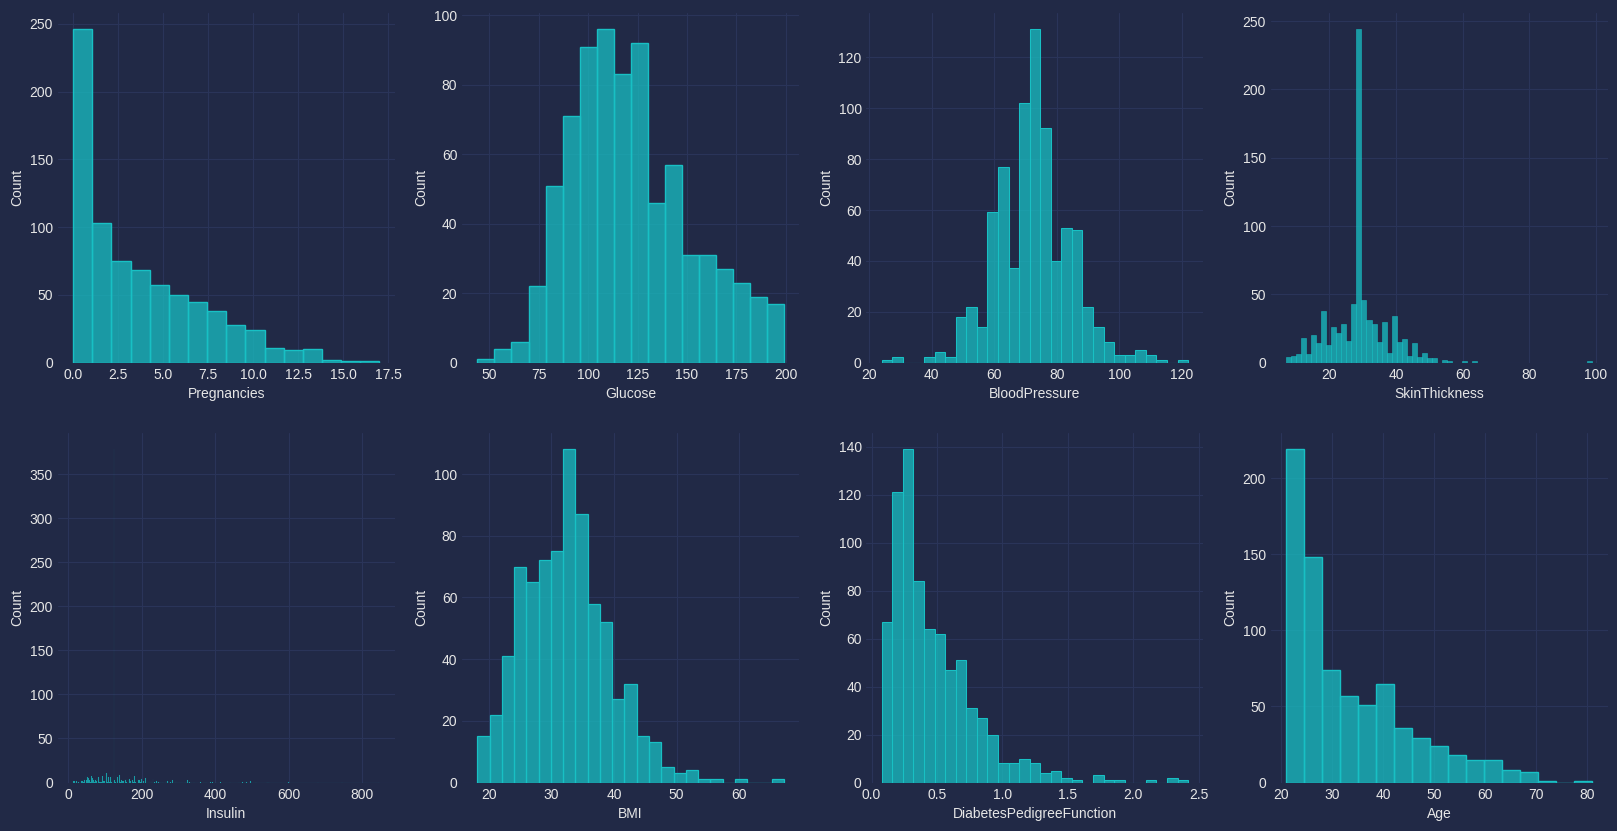

In [20]:
num_columns = len(df1.columns) - 1
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(20, 10))
for i, x in enumerate(df1.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df1[x], edgecolor=pitayasmoothie[0])
plt.show()

### Puntos Atípicos

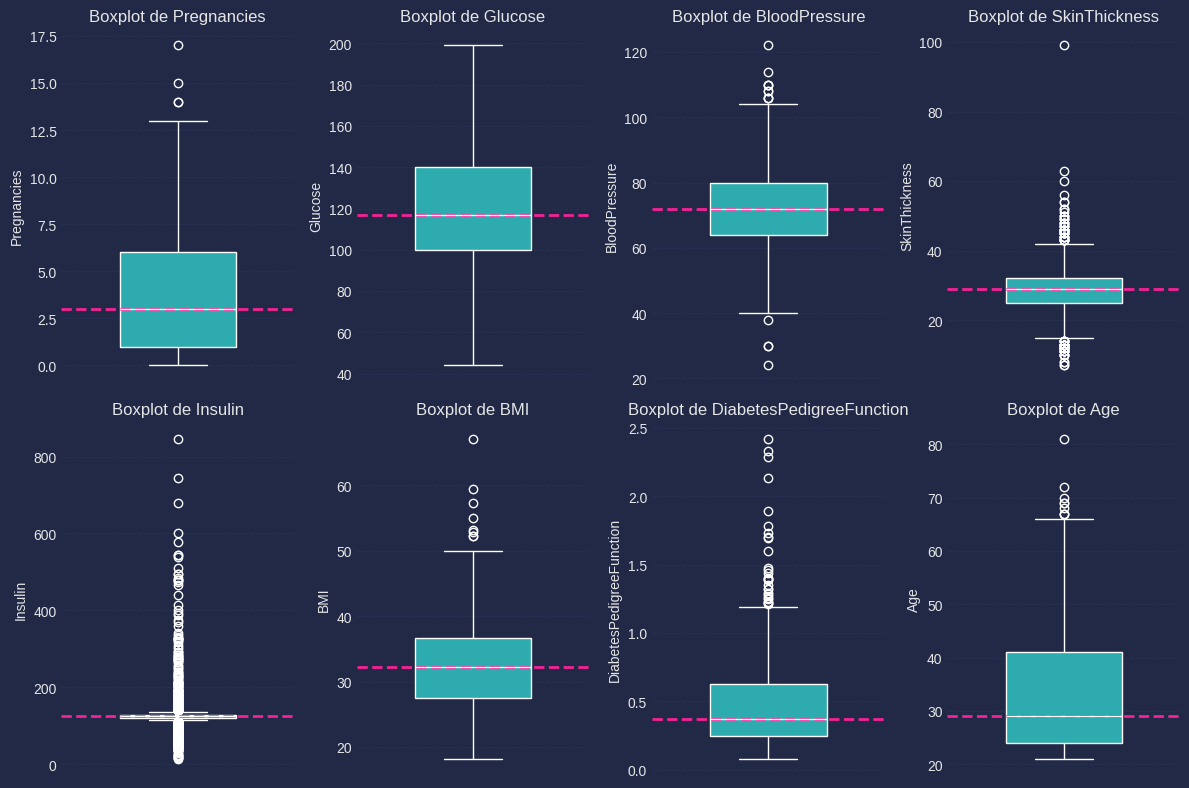

In [21]:
numerical_cols = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df1[column], width=0.5, linecolor=pitayasmoothie[5] )
    plt.axhline(y=df1[column].median(), color=pitayasmoothie[1], linestyle="--", linewidth=2)
    plt.title(f"Boxplot de {column}", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()

plt.show()

### Imbalaced Data

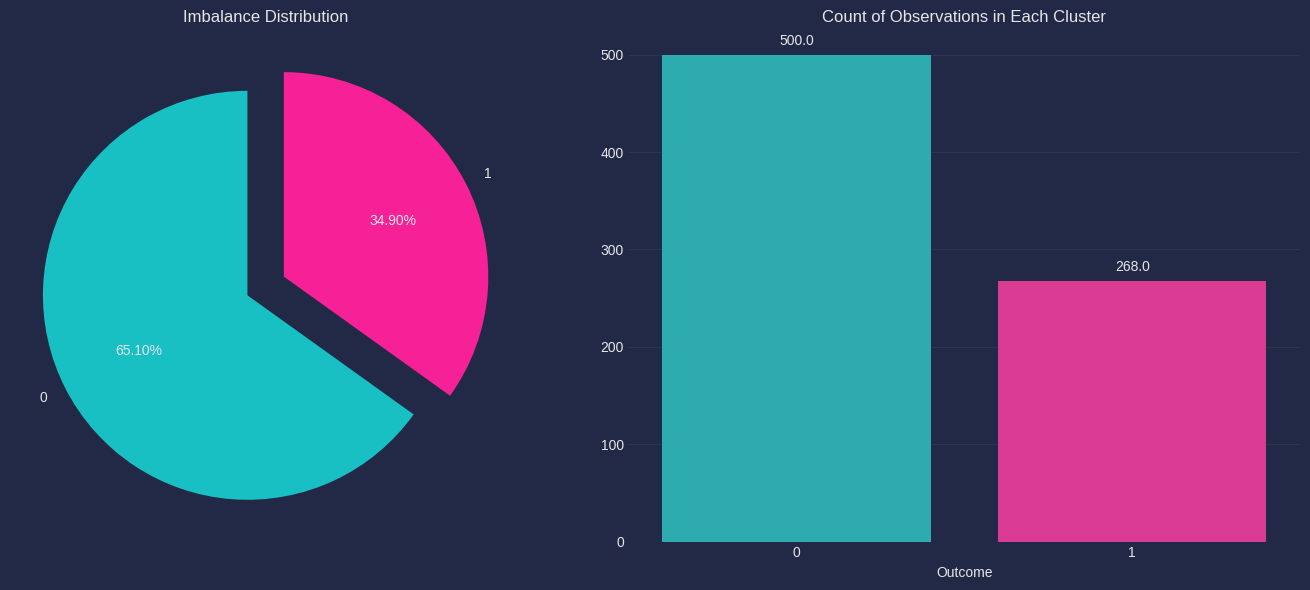

In [22]:
good_count = df1["Outcome"].eq(0).sum()
bad_count = df1["Outcome"].eq(1).sum()
total_count = len(df1)

good_percentage = (good_count / total_count) * 100
bad_percentage = (bad_count / total_count) * 100

label_counts = df1["Outcome"].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pie_values = [good_percentage, bad_percentage]
plt.pie(
    pie_values,
    labels=["0", "1"],
    autopct="%1.2f%%",
    startangle=90,
    explode=(0.1, 0.1),
    colors=colors,
)
plt.title("Imbalance Distribution")

plt.subplot(1, 2, 2)
ax = sns.barplot(
    x=label_counts.index, y=label_counts.values, palette=colors
)
for i in ax.patches:
    ax.annotate(
        f"{i.get_height()}",
        (i.get_x() + i.get_width() / 2.0, i.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )
ax.set_xticks([0, 1])
ax.set_xticklabels(["0", "1"])
plt.title("Count of Observations in Each Cluster")

plt.tight_layout()
plt.show()

### Normalización

In [23]:
features_to_scale_robust = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]


robust_scaler = RobustScaler()

df1[features_to_scale_robust] = robust_scaler.fit_transform(
    df1[features_to_scale_robust]
)


def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()


for feature in features_to_scale_robust:
    num_outliers = count_outliers(df1[feature])
    print(f"Number of outliers in {feature}: {num_outliers}")

Number of outliers in Pregnancies: 4
Number of outliers in Glucose: 0
Number of outliers in BloodPressure: 14
Number of outliers in SkinThickness: 87
Number of outliers in Insulin: 346
Number of outliers in BMI: 8
Number of outliers in DiabetesPedigreeFunction: 29
Number of outliers in Age: 9


In [24]:
scaler = StandardScaler()

df1[features_to_scale_robust] = scaler.fit_transform(df1[features_to_scale_robust])

In [25]:
X = df1.drop(["Outcome"], axis=1)
y = df1["Outcome"]

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [27]:
X_resampled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.238575,0.530606,0.497614,0.246582,0.157570,0.304304,0.174736,0.216179
std,0.200809,0.199123,0.118097,0.091589,0.102546,0.136400,0.141191,0.189633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.380645,0.428571,0.209757,0.133413,0.210549,0.075149,0.066667
50%,0.176471,0.503226,0.489796,0.239130,0.133413,0.298569,0.133646,0.166667
75%,0.367203,0.658311,0.571429,0.282609,0.153075,0.388167,0.245738,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



 <div style="background-color: #4CAF50; padding: 10px; border-radius: 5px;">
    <p style="color: black; font-size: 16px; font-weight: bold;">
         Testing  Data
    </p>
</div>


T-statistic: -4.529514732631426e-16
P-value: 0.9999999999999996


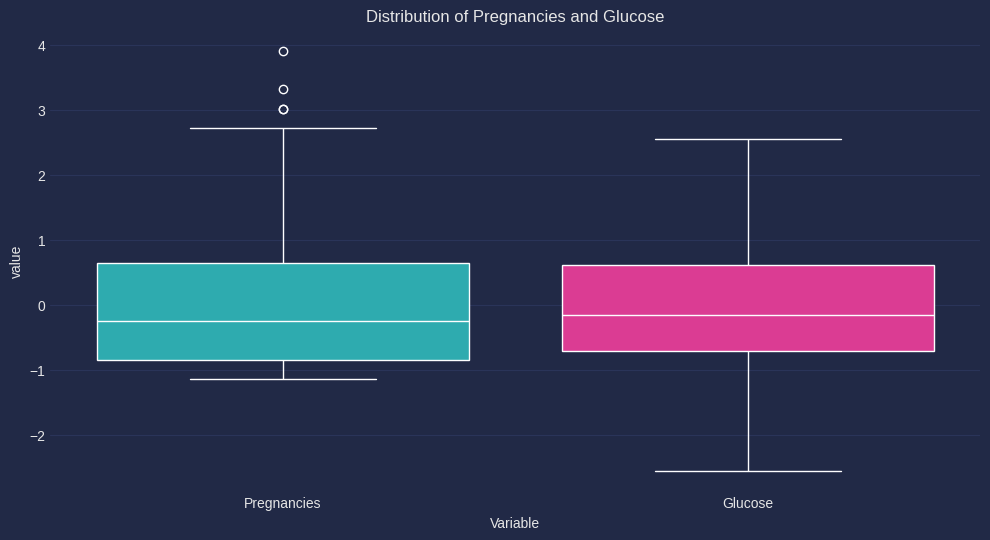

T-statistic: -3.850087522736712e-16
P-value: 0.9999999999999997


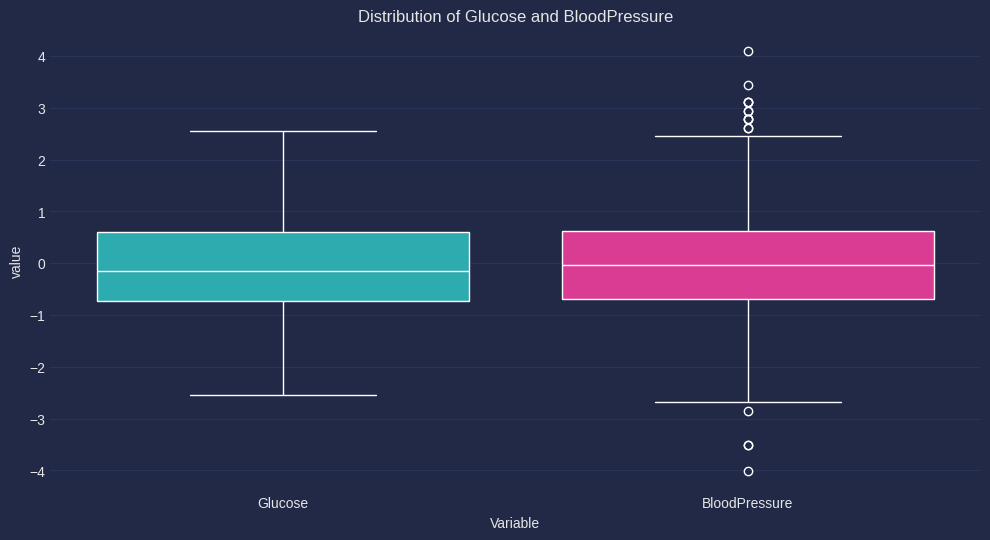

T-statistic: 3.397136049473569e-16
P-value: 0.9999999999999998


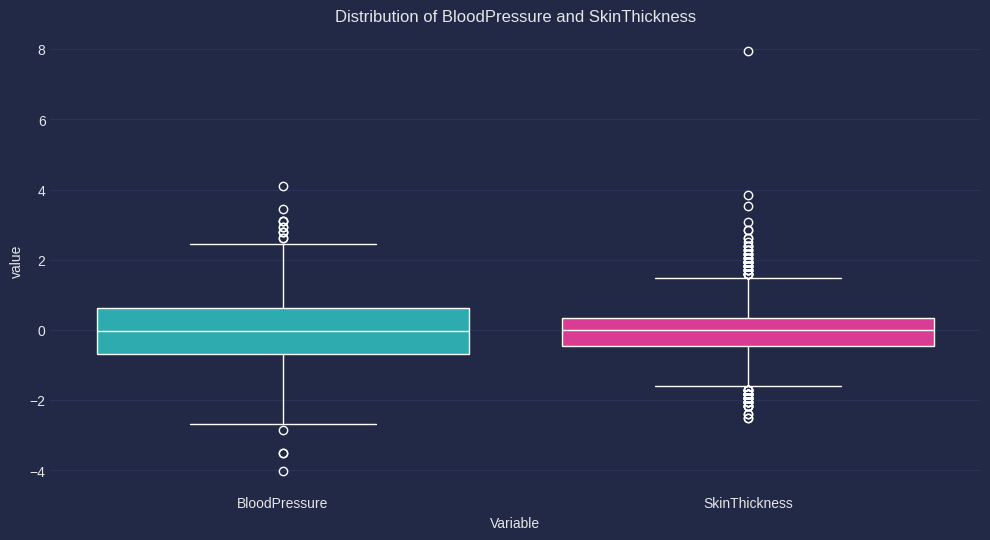

T-statistic: -5.435417679157711e-16
P-value: 0.9999999999999996


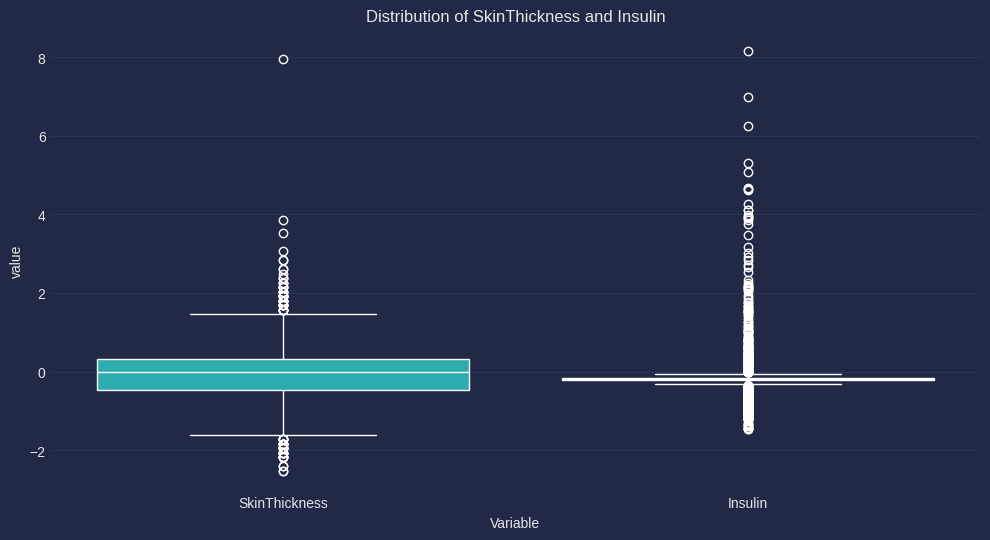

T-statistic: -4.529514732631422e-17
P-value: 1.0


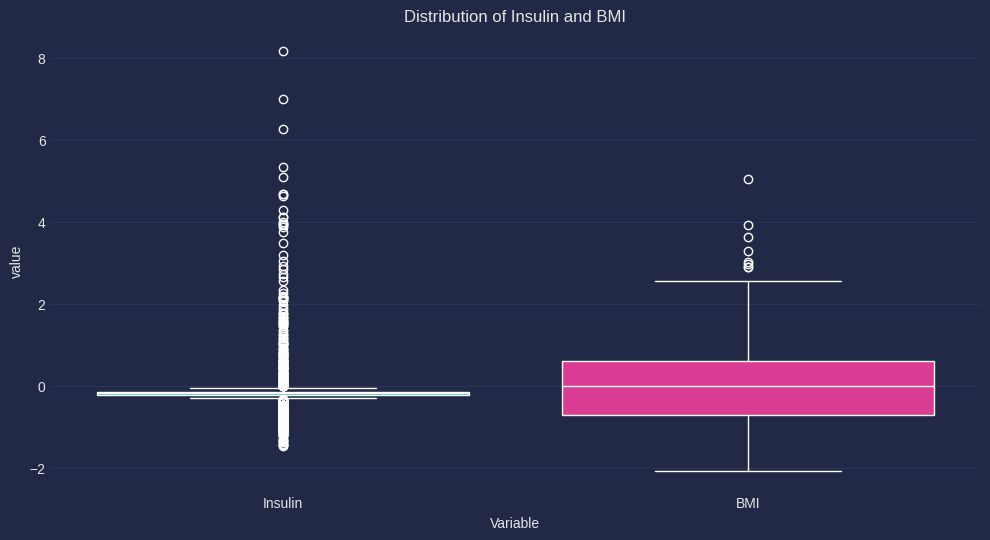

T-statistic: 3.6236117861051403e-16
P-value: 0.9999999999999998


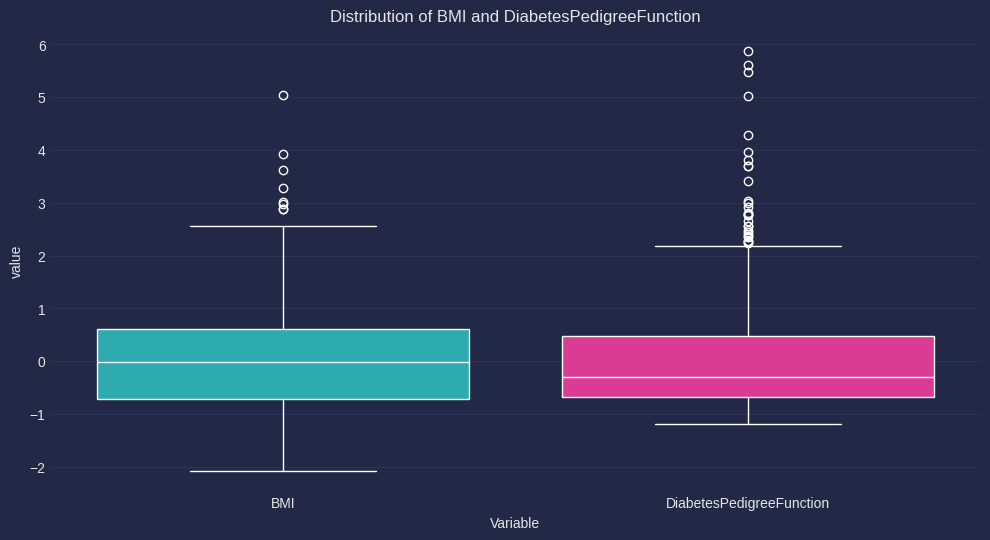

T-statistic: 7.473699308841851e-16
P-value: 0.9999999999999993


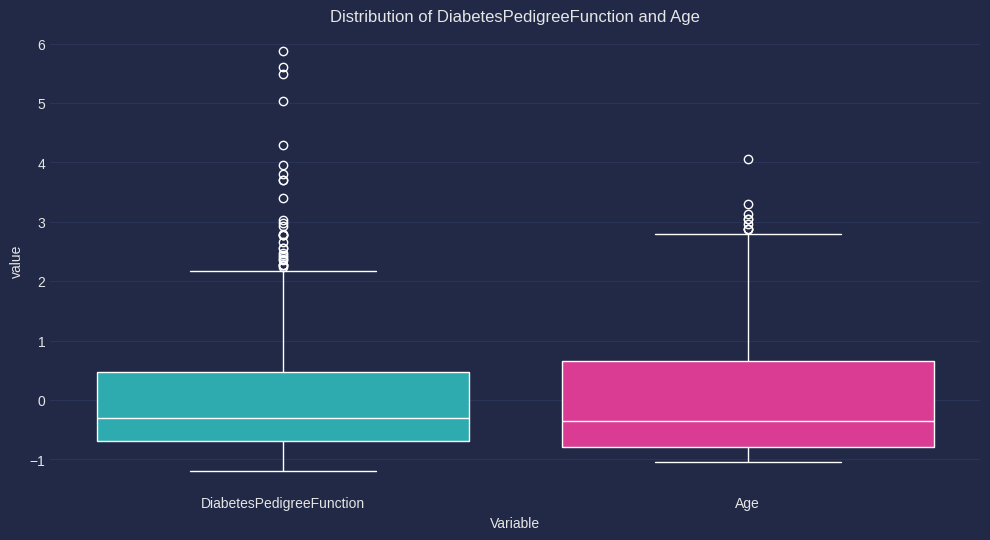

In [28]:
def hypothesis_testing(df, column1, column2):
    t_stat, p_val = stats.ttest_ind(df[column1], df[column2])

    print("T-statistic:", t_stat)
    print("P-value:", p_val)

    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x="Variable",
        y="value",
        hue="Variable",
        data=pd.melt(df[[column1, column2]], var_name="Variable", value_name="value"),
        linecolor=pitayasmoothie[5]
    )

    plt.title(f"Distribution of {column1} and {column2}")
    plt.show()


columns_for_testing = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]

for i in range(len(columns_for_testing) - 1):
    hypothesis_testing(df1, columns_for_testing[i], columns_for_testing[i + 1])

> **Nota**
Con valores P aproximándose a 1.0, no rechazamos la hipótesis nula en cada prueba t, lo que sugiere que no hay una diferencia significativa entre las dos columnas que se están probando. Esta conclusión se basa en el nivel de significancia comúnmente establecido de 0.05. Si tienes un nivel de significancia más bajo, como 0.01, aún puede que no seas capaz de rechazar la hipótesis nula.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=1
)

## Modelado


### SVC


In [30]:
param_dist = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.1, 1],
}

svc = SVC()

randomized_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
)

randomized_search.fit(X_train, y_train)

best_params = randomized_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_svc_model = randomized_search.best_estimator_
svc_predicted = best_svc_model.predict(X_test)

svc_acc_score = accuracy_score(y_test, svc_predicted)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

print("\nConfusion Matrix:")
print(svc_conf_matrix)
print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, "\n")
print("Classification Report:")
print(classification_report(y_test, svc_predicted))

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}

Confusion Matrix:
[[79 32]
 [12 77]]

Accuracy of Support Vector Classifier: 78.0 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       111
           1       0.71      0.87      0.78        89

    accuracy                           0.78       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.78      0.78       200




### Extra Trees Clasifier


In [31]:
param_dist_et = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}

et = ExtraTreesClassifier()

randomized_search_et = RandomizedSearchCV(
    et,
    param_distributions=param_dist_et,
    n_iter=10,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
)

randomized_search_et.fit(X_train, y_train)

best_params_et = randomized_search_et.best_params_
print(f"Best Hyperparameters for Extra Trees Classifier: {best_params_et}")

best_et_model = randomized_search_et.best_estimator_

et_predicted = best_et_model.predict(X_test)

et_acc_score = accuracy_score(y_test, et_predicted)

et_conf_matrix = confusion_matrix(y_test, et_predicted)


print("\nConfusion Matrix for Extra Trees Classifier:")
print(et_conf_matrix)
print("\nAccuracy of Extra Trees Classifier:", et_acc_score * 100, "\n")
print("Classification Report for Extra Trees Classifier:")
print(classification_report(y_test, et_predicted))

Best Hyperparameters for Extra Trees Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}

Confusion Matrix for Extra Trees Classifier:
[[83 28]
 [ 9 80]]

Accuracy of Extra Trees Classifier: 81.5 

Classification Report for Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       111
           1       0.74      0.90      0.81        89

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.82       200




### XGB Classifier



In [32]:
param_dist_xgb = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0, 0.1, 0.2, 0.3],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.2, 0.3],
    "reg_lambda": [1, 1.1, 1.2, 1.3],
}

xgb = XGBClassifier()

randomized_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
)

randomized_search_xgb.fit(X_train, y_train)

best_params_xgb = randomized_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")

best_xgb_model = randomized_search_xgb.best_estimator_

xgb_predicted = best_xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)

print("\nConfusion Matrix for XGBoost:")
print(xgb_conf_matrix)
print("\nAccuracy of XGBoost Classifier:", xgb_acc_score * 100, "\n")
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_predicted))

Best Hyperparameters for XGBoost: {'subsample': 0.9, 'reg_lambda': 1.1, 'reg_alpha': 0.2, 'n_estimators': 50, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}

Confusion Matrix for XGBoost:
[[80 31]
 [12 77]]

Accuracy of XGBoost Classifier: 78.5 

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       111
           1       0.71      0.87      0.78        89

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.79       200




### KNeighbors Classifier



In [33]:
param_dist_knn = {
    "n_neighbors": [3, 5, 7, 10],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [10, 20, 30, 40],
    "p": [1, 2],
}

knn = KNeighborsClassifier()

randomized_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
)

randomized_search_knn.fit(X_train, y_train)

best_params_knn = randomized_search_knn.best_params_
print(f"Best Hyperparameters for KNeighborsClassifier: {best_params_knn}")

best_knn_model = randomized_search_knn.best_estimator_

knn_predicted = best_knn_model.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)

print("\nConfusion Matrix for KNeighborsClassifier:")
print(knn_conf_matrix)
print("\nAccuracy of KNeighborsClassifier:", knn_acc_score * 100, "\n")
print("Classification Report for KNeighborsClassifier:")
print(classification_report(y_test, knn_predicted))

Best Hyperparameters for KNeighborsClassifier: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'leaf_size': 40, 'algorithm': 'ball_tree'}

Confusion Matrix for KNeighborsClassifier:
[[70 41]
 [ 8 81]]

Accuracy of KNeighborsClassifier: 75.5 

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74       111
           1       0.66      0.91      0.77        89

    accuracy                           0.76       200
   macro avg       0.78      0.77      0.75       200
weighted avg       0.79      0.76      0.75       200




### GaussianNB



In [34]:
param_dist = {}

gnb = GaussianNB()

randomized_search_gnb = RandomizedSearchCV(
    gnb,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
)

randomized_search_gnb.fit(X_train, y_train)

best_params_gnb = randomized_search_gnb.best_params_
print(f"Best Hyperparameters for GaussianNB: {best_params_gnb}")

best_gnb_model = randomized_search_gnb.best_estimator_

gnb_predicted = best_gnb_model.predict(X_test)

gnb_acc_score = accuracy_score(y_test, gnb_predicted)

gnb_conf_matrix = confusion_matrix(y_test, gnb_predicted)

print("\nConfusion Matrix:")
print(gnb_conf_matrix)
print("\nAccuracy of GaussianNB Classifier:", gnb_acc_score * 100, "\n")
print("Classification Report:")
print(classification_report(y_test, gnb_predicted))

Best Hyperparameters for GaussianNB: {}

Confusion Matrix:
[[80 31]
 [34 55]]

Accuracy of GaussianNB Classifier: 67.5 

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       111
           1       0.64      0.62      0.63        89

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.68      0.67       200




### El mejor modelo es el Clasificador de Árboles Extra (Extra Trees Classifier).


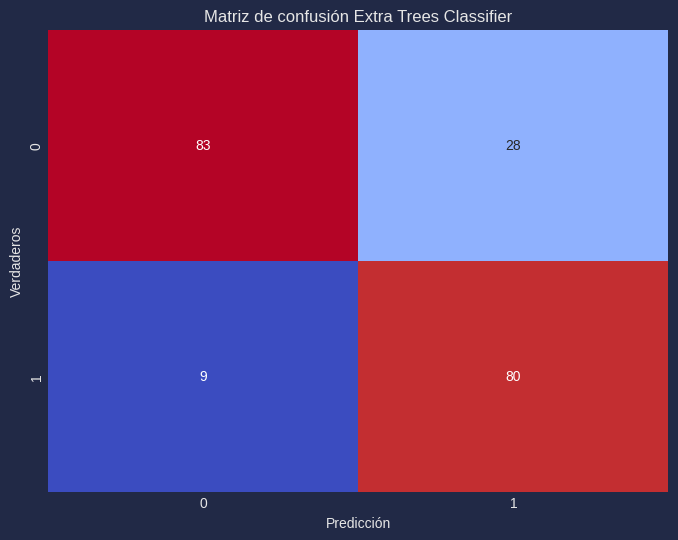

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       111
           1       0.74      0.90      0.81        89

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.82       200



In [42]:
et_conf_matrix = confusion_matrix(y_test, et_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(et_conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Matriz de confusión Extra Trees Classifier")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.show()


print(classification_report(y_test, et_predicted))


### Curva de aprendisaje


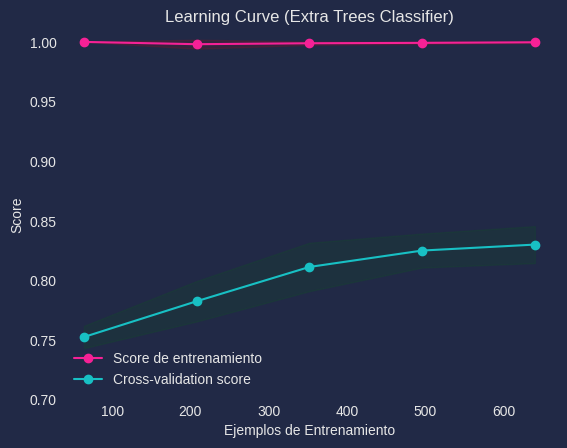

In [52]:
def plot_learning_curve(
    estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)
):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color=pitayasmoothie[1], label="Score de entrenamiento")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color=pitayasmoothie[0], label="Cross-validation score"
    )

    plt.legend(loc="best")
    return plt


plot_learning_curve(
    best_et_model,
    "Learning Curve (Extra Trees Classifier)",
    X_train,
    y_train,
    ylim=(0.7, 1.01),
    cv=5,
)

plt.show()


### Cross Validation

In [53]:
cv_scores_et = cross_val_score(
    best_et_model, X_train, y_train, cv=5, scoring="accuracy"
)

print("Cross-validation scores for Extra Trees Classifier:", cv_scores_et)
print("Mean Cross-validation score for Extra Trees Classifier:", cv_scores_et.mean())
print(
    "Standard Deviation of Cross-validation scores for Extra Trees Classifier:",
    cv_scores_et.std(),
)

Cross-validation scores for Extra Trees Classifier: [0.81875 0.825   0.83125 0.8125  0.8125 ]
Mean Cross-validation score for Extra Trees Classifier: 0.82
Standard Deviation of Cross-validation scores for Extra Trees Classifier: 0.007288689868556634



## Curva ROC 



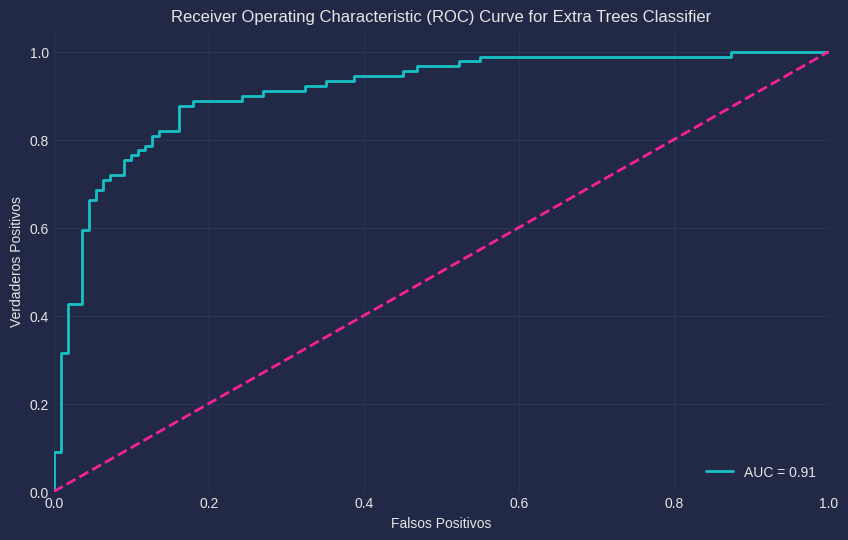

In [56]:
et_probs = best_et_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, et_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Receiver Operating Characteristic (ROC) Curve for Extra Trees Classifier")
plt.legend(loc="lower right")
plt.show()


> * 90% - 100% = Excelente
> * 80% - 90% = Bueno
> * 70% - 80% = Malo
> * 60% - 70% = Pobre
> * 50% - 60% = Fallido



## Importancia de las Características

Feature Importance for Extra Trees Classifier:
                    Feature  Importance
1                   Glucose    0.273517
7                       Age    0.135056
5                       BMI    0.133738
0               Pregnancies    0.113971
6  DiabetesPedigreeFunction    0.093023
4                   Insulin    0.089768
3             SkinThickness    0.084104
2             BloodPressure    0.076822


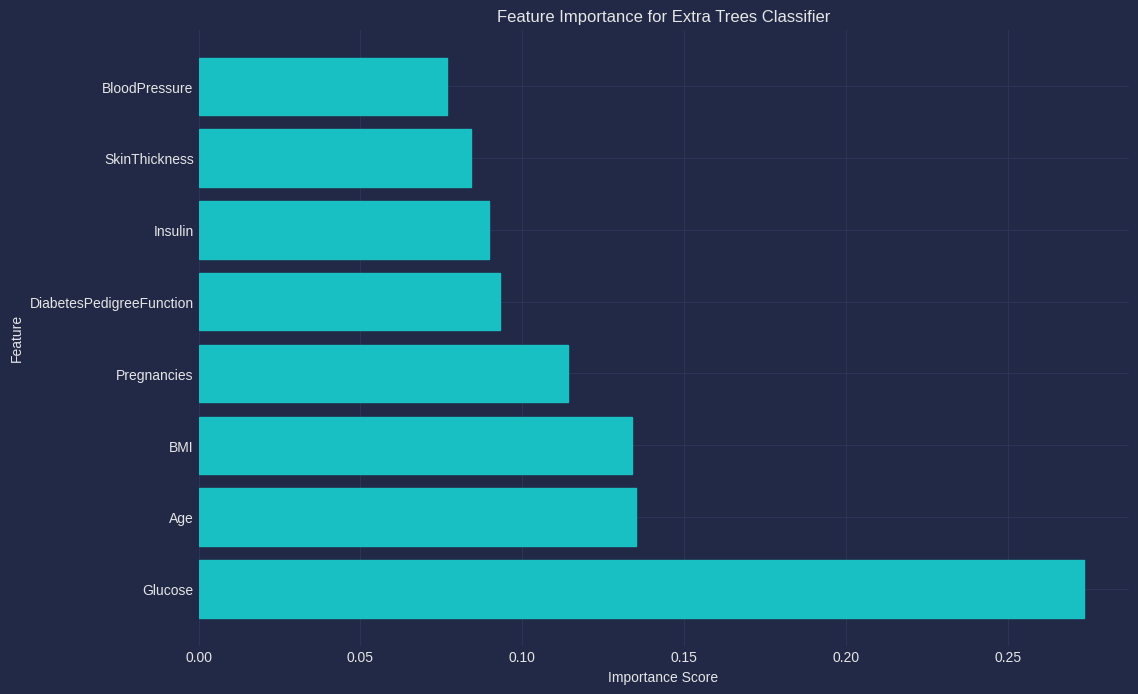

In [57]:
feature_importances = best_et_model.feature_importances_

feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importances}
)

feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

print("Feature Importance for Extra Trees Classifier:")
print(feature_importance_df)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], edgecolor=pitayasmoothie[0])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Extra Trees Classifier")
plt.show()